# **NEW YORK AIRBNB EDA**

## **PASO 1: PLANTEAMIENTO DEL PROBLEMA Y RECOLPILACIÓN DE DATOS**

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

<br>

## **PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS**

In [ ]:
# Obtención Dimensiones

total_data.shape

(48895, 16)

El DataFrame contiene 48.895 registros (filas) y 16 variables (columnas).

<br>

In [ ]:
# Obtención de tipo de datos y valores nulos

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

De la información anterior, vemos que tenemos algunos registros NaN, siendo los más grandes las columnas **last_review** y **reviews_per_month**.

En términos de tipos de datos, tenemos:

- **8 características categóricas** (id, name, host_id, host_name, neighborhood_group, neighborhood, room_type, availability_365)
- **8 características numéricas** (latitud, longitud, precio, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculate_host_listings_count)

<br>

**Eliminación de duplicados**

In [5]:
# Eliminación de duplicados

print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


**Eliminación de información irrelevante**

In [6]:
# Eliminación información irrelevante

total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


<br>

## **PASO 3: ANÁLISIS DE VARIABLES UNIVARIANTES**

**ANÁLISIS DE VARIABLES CATEGÓRICAS**

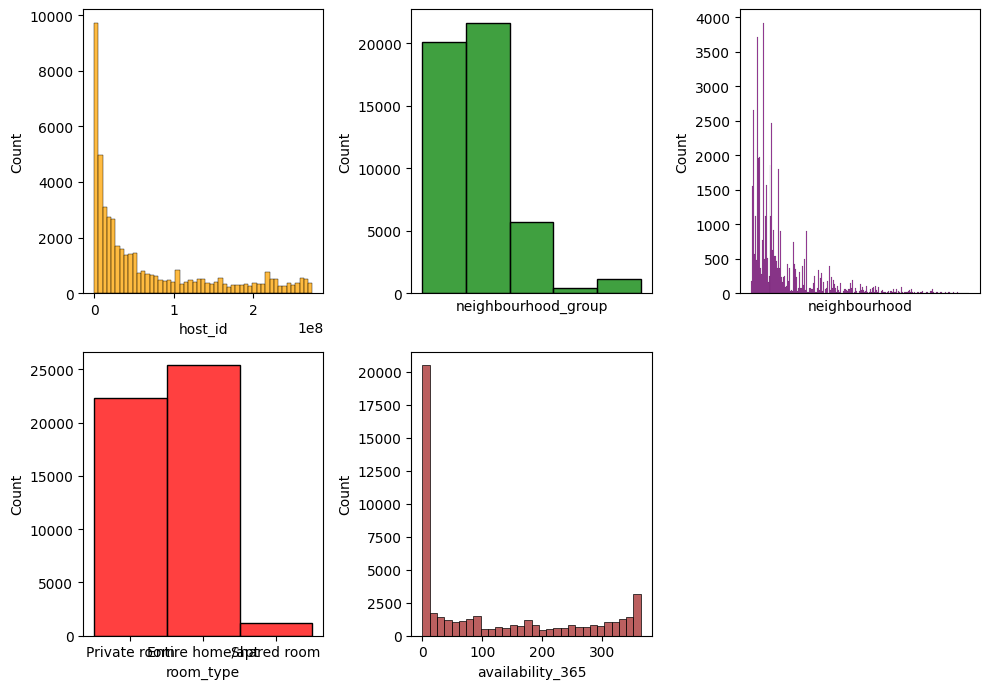

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram with custom colors
sns.histplot(ax=axis[0, 0], data=total_data, x="host_id", color="orange")
sns.histplot(ax=axis[0, 1], data=total_data, x="neighbourhood_group", color="green").set_xticks([])
sns.histplot(ax=axis[0, 2], data=total_data, x="neighbourhood", color="purple").set_xticks([])
sns.histplot(ax=axis[1, 0], data=total_data, x="room_type", color="red")
sns.histplot(ax=axis[1, 1], data=total_data, x="availability_365", color="brown")

# Remove the last subplot
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


En el histograma podemos observar lo siguiente:

- Hay varios anfitriones con muchas habitaciones para alquilar, pero también hay muchos NaN para el host_id.
- En nuestro conjunto de datos, solo tenemos 5 áreas, Brooklyn, Manhattan, Queens, Staten Island y el Bronx, los 5 distritos, lo que confirma que en - realidad solo estamos analizando la ciudad de Nueva York.
- Es evidente que algunos vecindarios tienen más ofertas de habitaciones de Airbnb que otros.
- Hay más casas o apartamentos completos para alquilar que habitaciones privadas, y las habitaciones compartidas son el tipo de habitación menos disponible.
- La mayoría de las habitaciones están disponibles los 365 días del año, pero en nuestro conjunto de datos hay muchos 0/NaN para esta categoría, lo que debe ser un error o una falta de información.

<br>

**ANÁLISIS DE VARIABLES NUMÉRICAS**

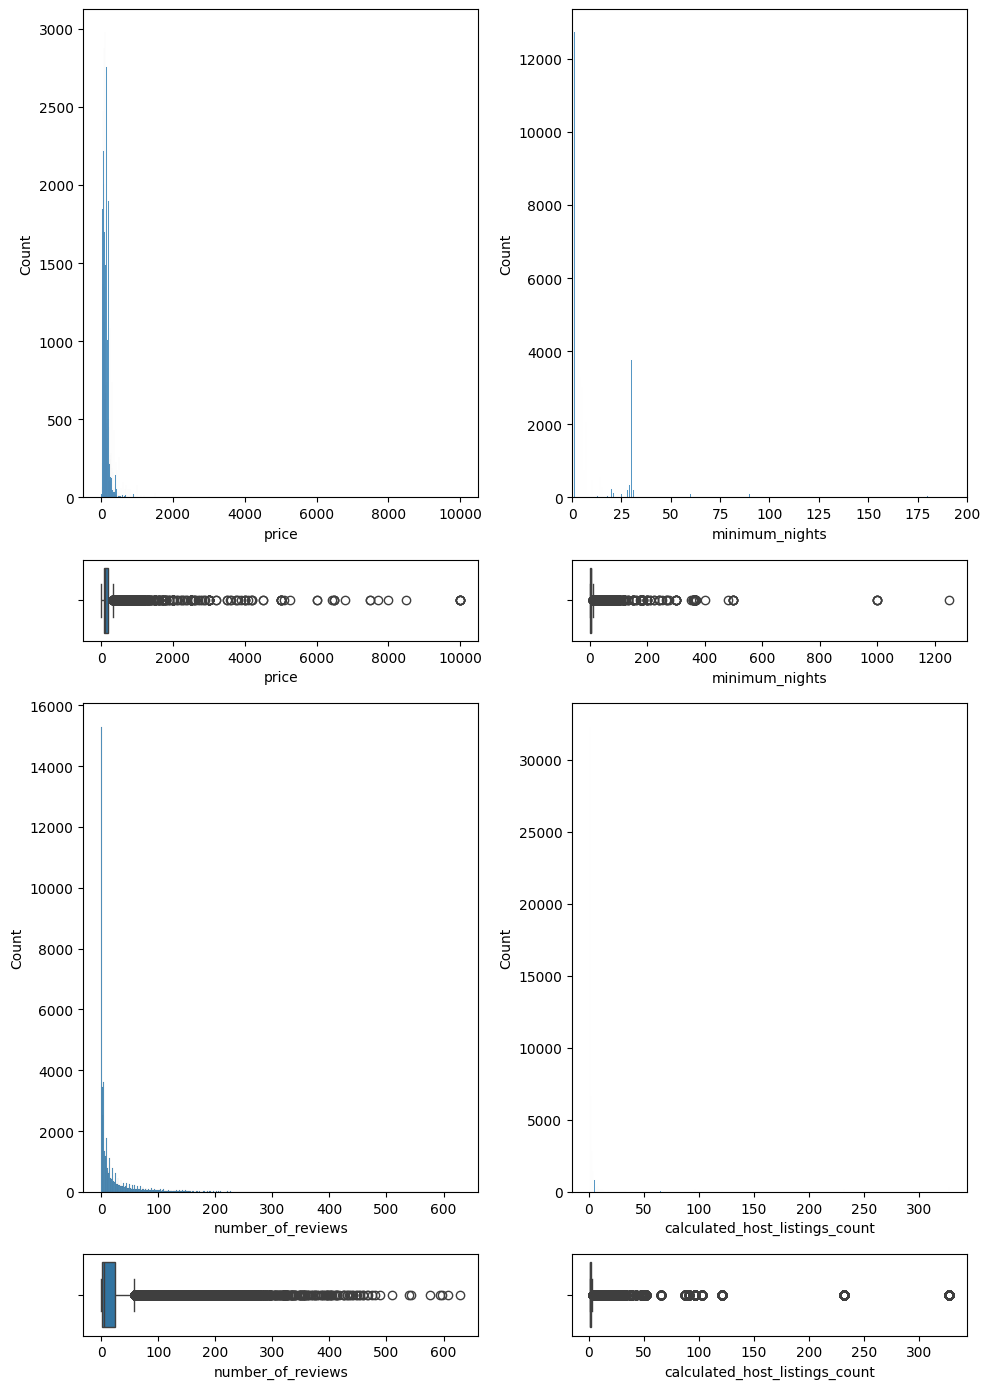

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<br>

# **PASO 4: ANÁLISIS DE VARIABLE MULTIVARIANTE**

**ANÁLISIS NÚMERICO - NUMÉRICO**

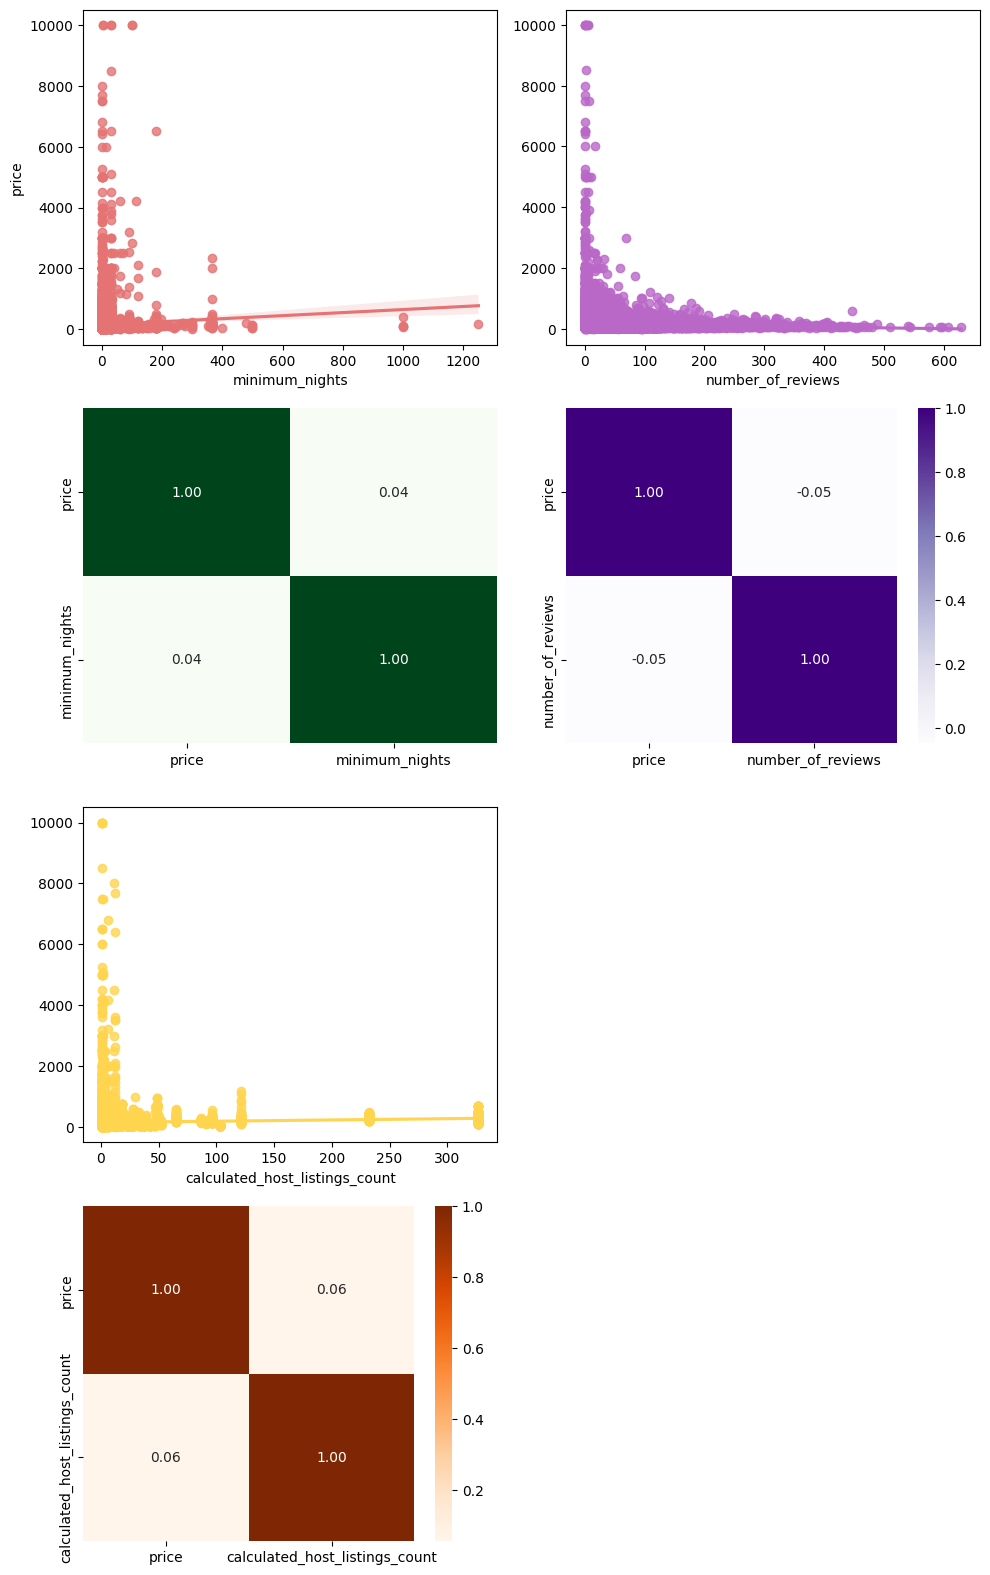

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer una paleta de colores personalizada
sns.set_palette(sns.color_palette(["#E57373", "#81C784", "#BA68C8", "#FFD54F"]))

# Crear el canvas con subplots
fig, axis = plt.subplots(4, 2, figsize=(10, 16))

# Crear gráficos con colores ajustados
sns.regplot(ax=axis[0, 0], data=total_data, x="minimum_nights", y="price", color="#E57373")
sns.heatmap(
    total_data[["price", "minimum_nights"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 0],
    cbar=False,
    cmap="Greens",  # Paleta verde para el mapa de calor
)

sns.regplot(
    ax=axis[0, 1],
    data=total_data,
    x="number_of_reviews",
    y="price",
    color="#BA68C8",
).set(ylabel=None)
sns.heatmap(
    total_data[["price", "number_of_reviews"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 1],
    cmap="Purples",  # Paleta morada para el mapa de calor
)

sns.regplot(
    ax=axis[2, 0],
    data=total_data,
    x="calculated_host_listings_count",
    y="price",
    color="#FFD54F",
).set(ylabel=None)
sns.heatmap(
    total_data[["price", "calculated_host_listings_count"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[3, 0],
    cmap="Oranges",  # Paleta naranja para el mapa de calor
).set(ylabel=None)

# Eliminar ejes vacíos
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Si observamos las relaciones anteriores, vemos que, según los valores de correlación:

- No existe relación entre el precio y la cantidad mínima de noches.
- No existe relación entre la cantidad de reseñas y el precio.

<br>

**ANÁLISIS CATEGÓRICO - CATEGÓRICO**

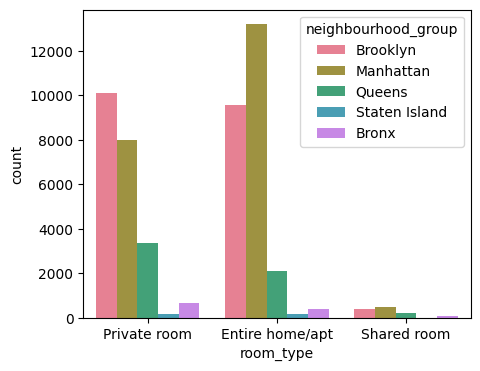

In [11]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Del análisis categórico, podemos concluir:

- Manhattan es el lugar con más lugares para alquilar y el que tiene más casas/habitaciones completas para alquilar.
- Brooklyn es el segundo grupo más grande para alquilar, pero tiene más habitaciones privadas, lo que significa que probablemente haya más personas compartiendo su casa o tratando de aprovecharla al máximo.
- Queens y Bronx son el tercero y cuarto y comparten el mismo principio que Brooklyn.
- Staten casi no tiene expresión y no es muy propenso a Airbnb.
Pero aparte de esto, no hay una gran relación entre el tipo de habitación y el vecindario.

**ANÁLISIS NUMÉRICO - CATEGÓRICO (completo)**

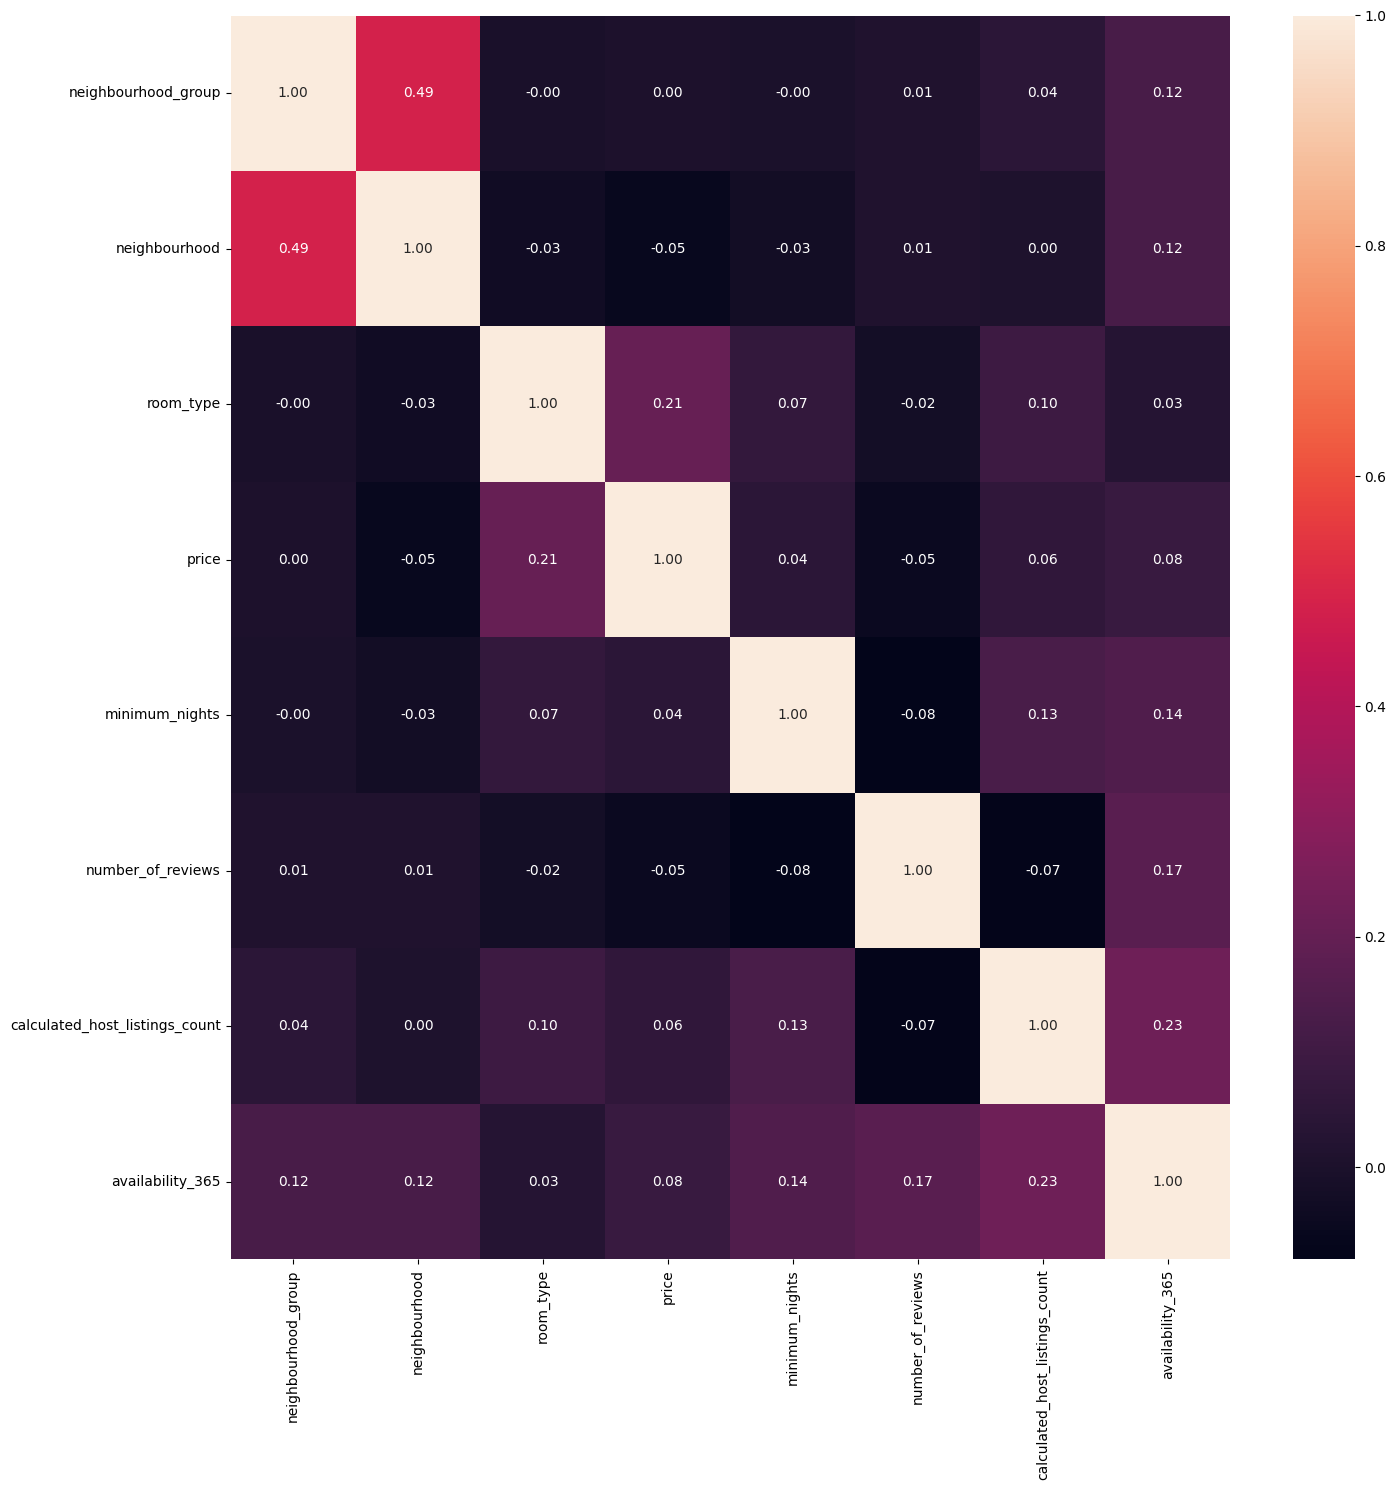

In [12]:
# Factorize the Room Type and Neighborhood Data
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Si analizamos los datos, vemos que hay una correlación muy baja entre todos ellos. Como máximo:

- Los anfitriones con más anuncios suelen tener más disponibilidad.
- Aparte de esto, resulta muy desalentador sacar conclusiones o establecer una relación.

**ANALIZANDO TODOS LOS DATOS A LA VEZ**

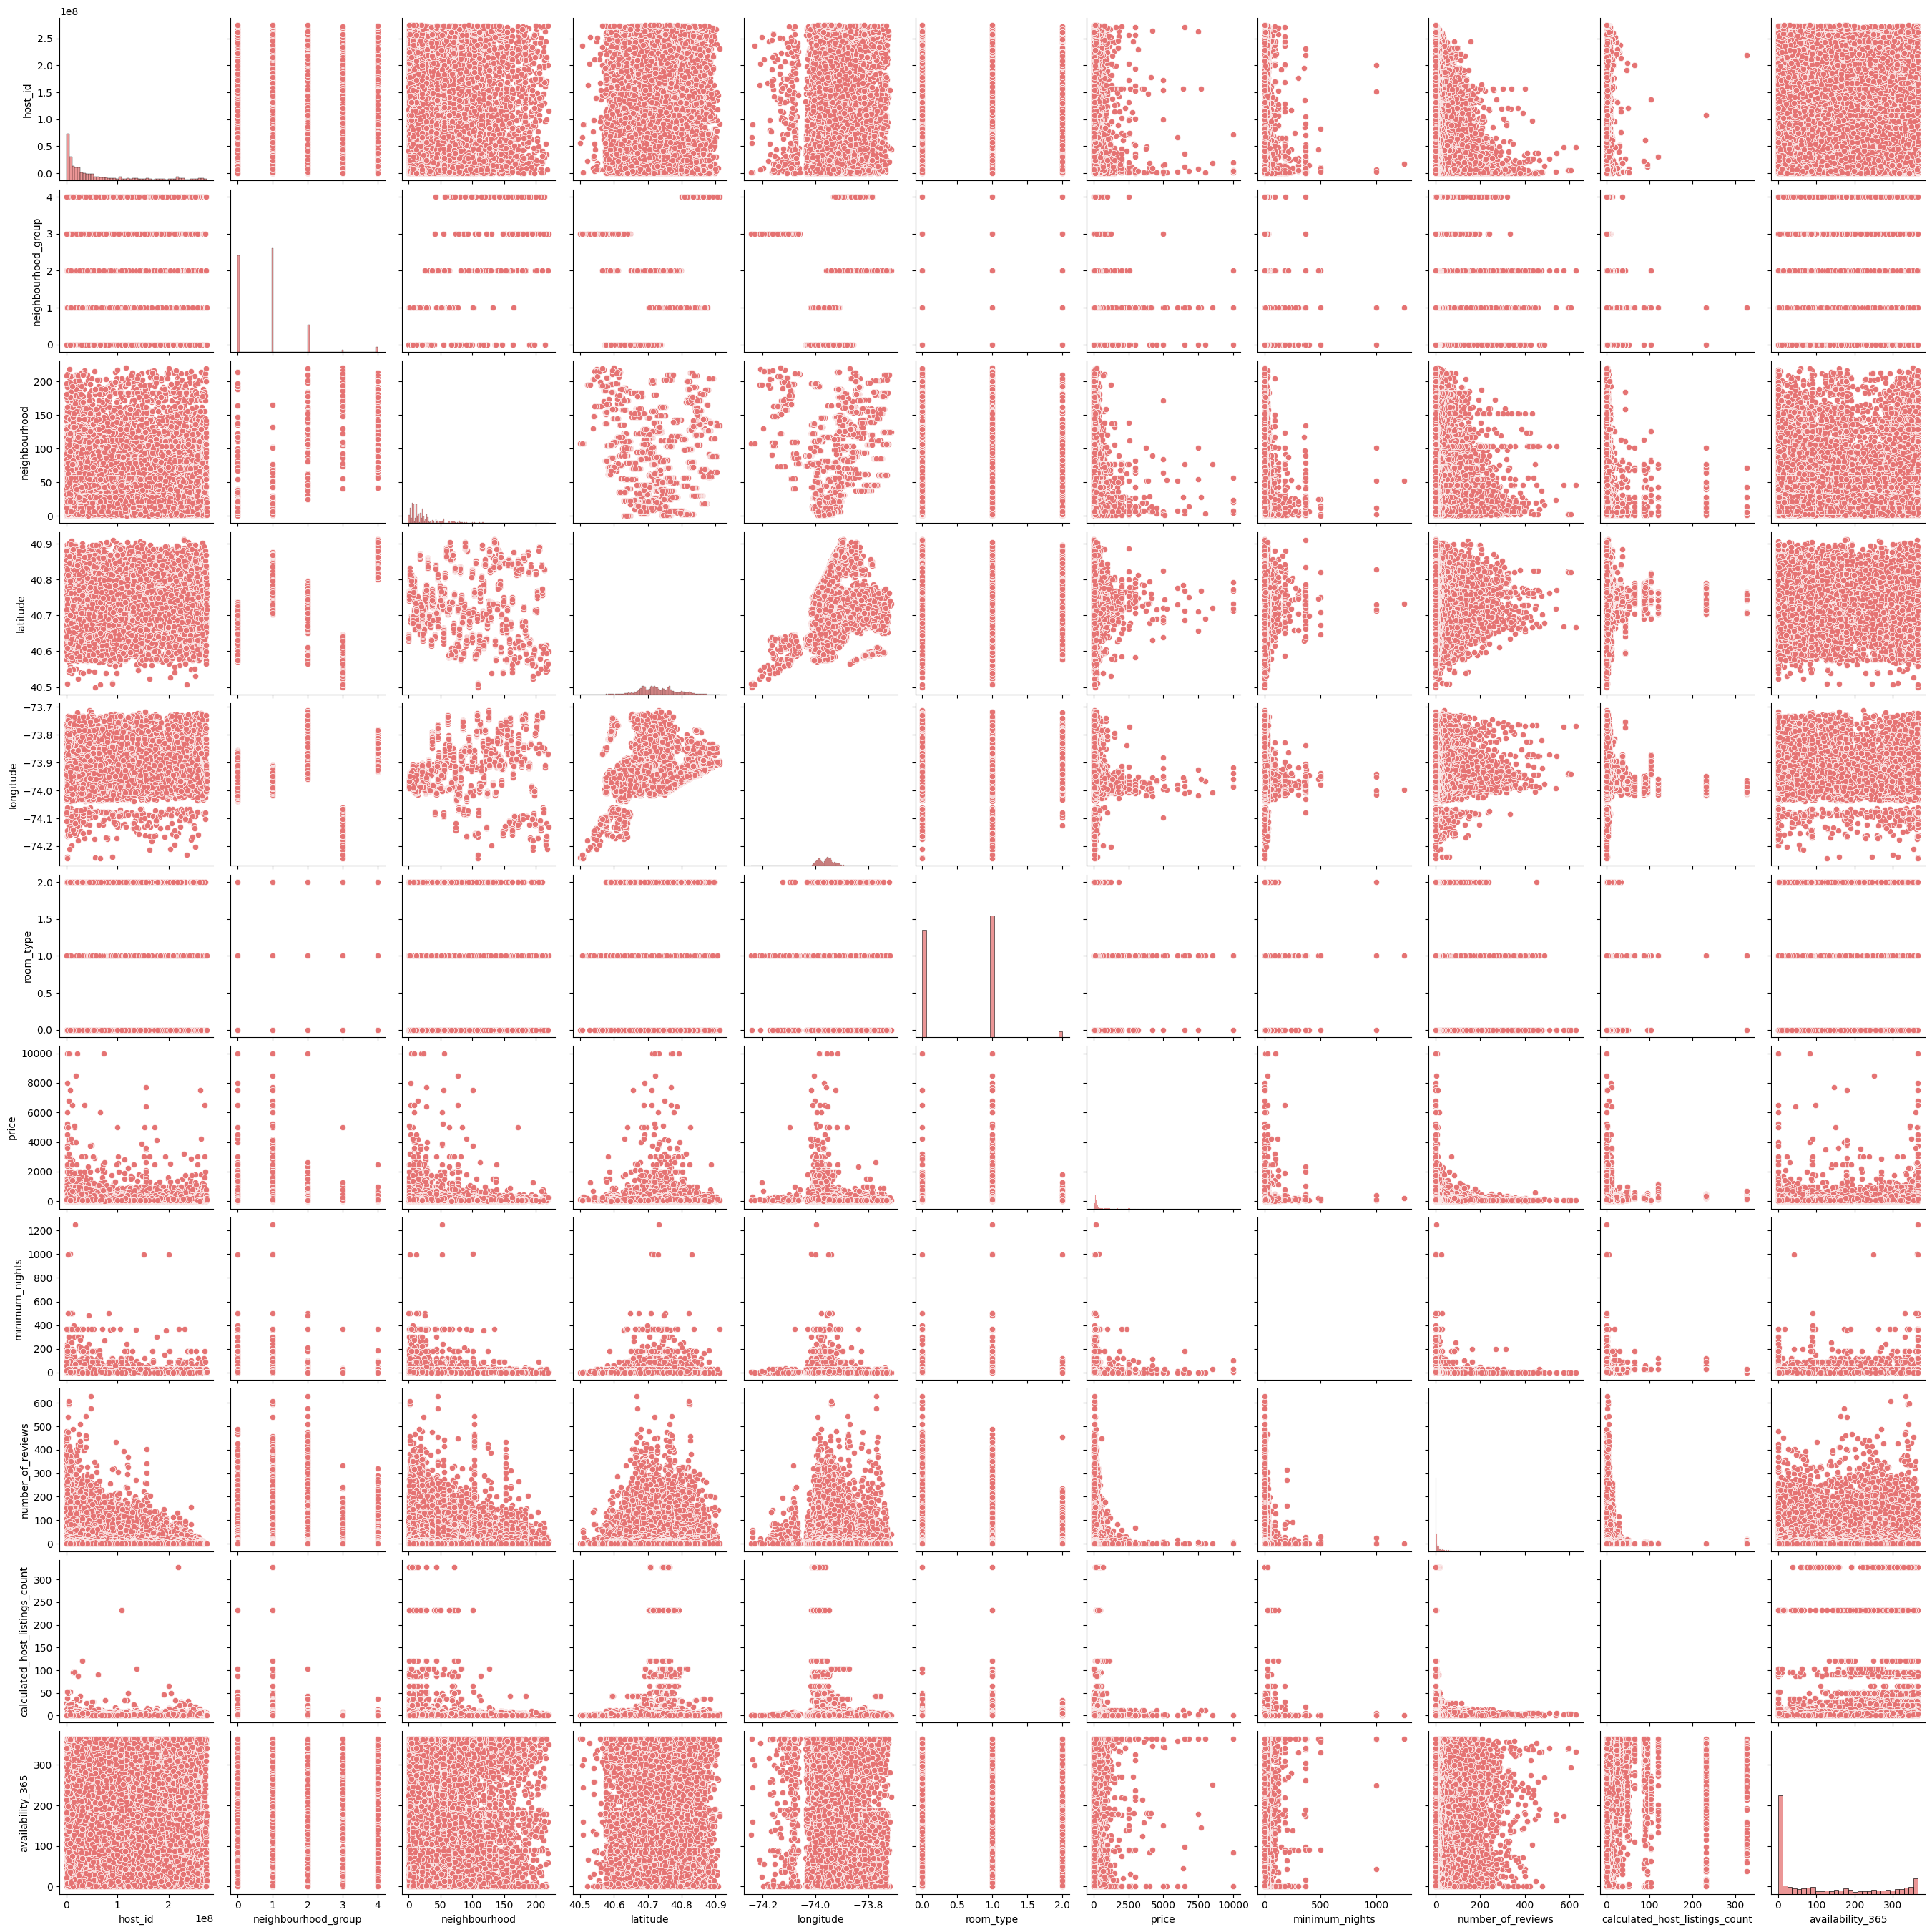

In [13]:
sns.pairplot(data = total_data)